<a href="https://colab.research.google.com/github/sweetiepickle/AI-2023-midterm-report/blob/main/AI_midterm_food_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

food classification

In [1]:
#libraries
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten,  LeakyReLU
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# data -> model -> compile -> evaluate

In [4]:
# step 1 : data initializing 

# orginal value of an image is from 0 to 255
# target value is from 0 to 1 
resizeData = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)    
trainingData= resizeData.flow_from_directory('/content/drive/MyDrive/AI 2023/data/food/train',target_size=(150,150), batch_size=32, class_mode='categorical')
inspectData= resizeData.flow_from_directory('/content/drive/MyDrive/AI 2023/data/food/test',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 3129 images belonging to 10 classes.
Found 20 images belonging to 10 classes.


In [5]:
# folder classifying
trainingData.class_indices

{'Banh cuon': 0,
 'Banh mi': 1,
 'Banh pia': 2,
 'Banh tet': 3,
 'Banh xeo': 4,
 'Bun dau mam tom': 5,
 'Ca kho to': 6,
 'Com tam': 7,
 'Nem': 8,
 'Pho': 9}

In [6]:
# folder classifying
inspectData.class_indices

{'Banh cuon': 0,
 'Banh mi': 1,
 'Banh pia': 2,
 'Banh tet': 3,
 'Banh xeo': 4,
 'Bun dau mam tom': 5,
 'Ca kho to': 6,
 'Com tam': 7,
 'Nem': 8,
 'Pho': 9}

In [11]:
# step 2 : cnn netwwork  : sequential model
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))

# Data flattening
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [12]:
# step 4 :compiling

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.fit(trainingData, batch_size = 128, epochs = 30 , verbose = 1)

Epoch 1/30
98/98 [==============================] - 1338s 13s/step - loss: 2.4875 - accuracy: 0.1115
Epoch 2/30
98/98 [==============================] - 70s 713ms/step - loss: 2.3016 - accuracy: 0.1256
Epoch 3/30
98/98 [==============================] - 68s 696ms/step - loss: 2.2963 - accuracy: 0.1294
Epoch 4/30
98/98 [==============================] - 70s 716ms/step - loss: 2.2841 - accuracy: 0.1409
Epoch 5/30
98/98 [==============================] - 70s 717ms/step - loss: 2.3038 - accuracy: 0.1326
Epoch 6/30
98/98 [==============================] - 70s 719ms/step - loss: 2.2438 - accuracy: 0.1604
Epoch 7/30
98/98 [==============================] - 71s 723ms/step - loss: 2.0912 - accuracy: 0.2256
Epoch 8/30
98/98 [==============================] - 72s 725ms/step - loss: 1.9330 - accuracy: 0.2995
Epoch 9/30
98/98 [==============================] - 71s 724ms/step - loss: 1.8055 - accuracy: 0.3595
Epoch 10/30
98/98 [==============================] - 71s 728ms/step - loss: 1.6900 - accura

In [17]:
# step 5 : evaluating
eva = model.evaluate(trainingData, verbose = 1 )
# verbose = 0 -> display nothing
# verbose = 1 -> display only learns recently
# verbose = 2 -> display everything learnt
print('loss: ', eva[0])
print('accuracy: ', eva[1])

98/98 [==============================] - 68s 696ms/step - loss: 0.3164 - accuracy: 0.8961
loss:  0.31637731194496155
accuracy:  0.8961329460144043


In [18]:
model.save('/content/drive/MyDrive/AI 2023/model AI/ food classification.h5')

In [20]:
model_1=load_model('/content/drive/MyDrive/AI 2023/model AI/ food classification.h5')

1/1 [==============================] - 1s 866ms/step
Ca kho to


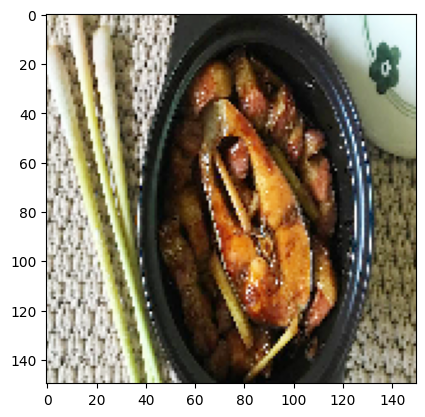

1/1 [==============================] - 0s 24ms/step
Banh tet


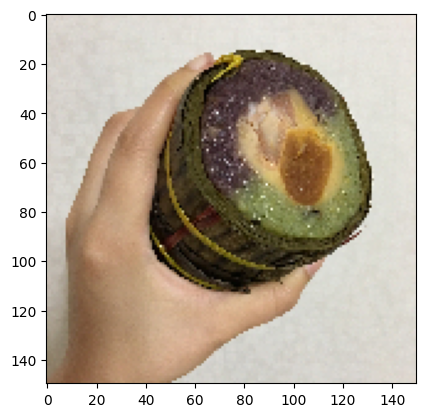

1/1 [==============================] - 0s 19ms/step
Banh pia


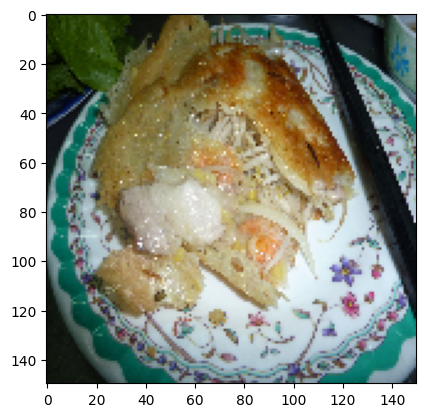

1/1 [==============================] - 0s 24ms/step
Com tam


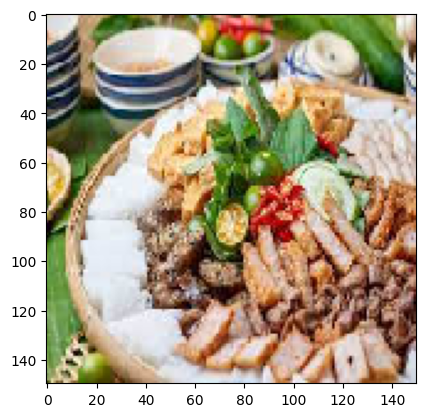

1/1 [==============================] - 0s 26ms/step
Banh xeo


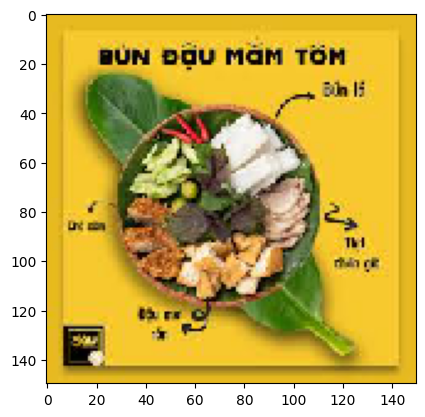

1/1 [==============================] - 0s 17ms/step
Banh mi


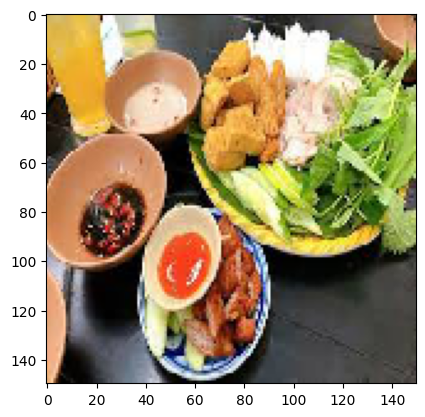

1/1 [==============================] - 0s 26ms/step
Banh mi


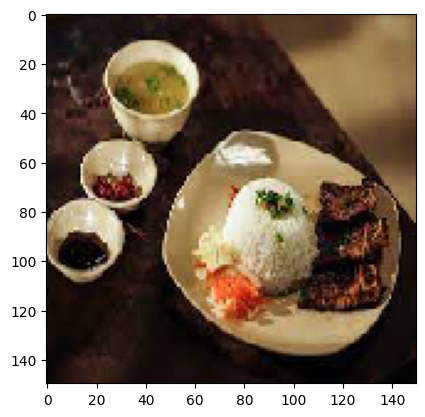

1/1 [==============================] - 0s 18ms/step
Pho


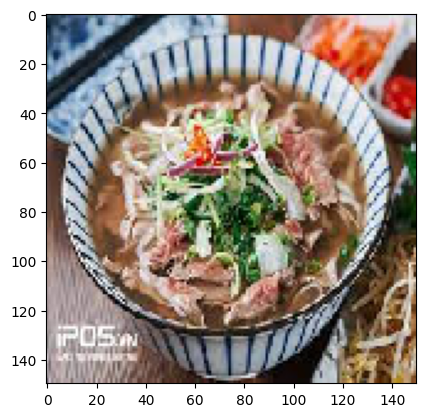

1/1 [==============================] - 0s 20ms/step
Com tam


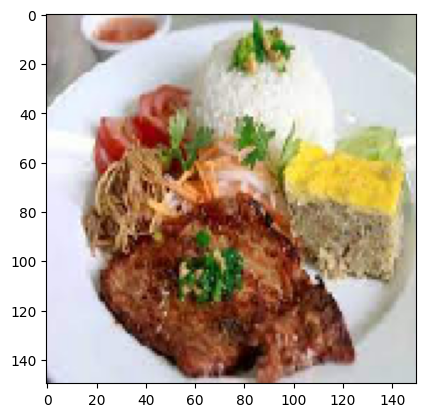

1/1 [==============================] - 0s 19ms/step
Ca kho to


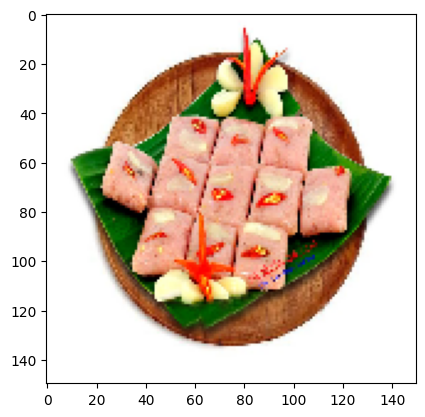

In [22]:
test = '/content/drive/MyDrive/AI 2023/data/food/validation'

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['Banh cuon','Banh mi','Banh pia','Banh tet','Banh xeo','Bun dau mam tom', 'Ca kho to','Com tam','Nem','Pho']
  print(class_name[result])
  plt.show()